<a href="https://colab.research.google.com/github/mgwalker71/Car-Claims/blob/main/Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


# Data Science Project - Car insurance claim prediction

![Claims](crash.png)

In [ ]:
df = pd.read_csv('C:/Users/mgw19/Documents/BPP/Prof_Practice/Carclaimsforinsurance.csv')
df.head()


,ID,KIDSDRIV,BIRTH,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,...,TRAVTIME,CAR_USE,BLUEBOOK,CAR_TYPE,OLDCLAIM,CLM_FREQ,CLM_AMT,CLM_FLG,CAR_AGE,URBANICITY
0,100130023,0,05/02/1955 00:00,2,13,26763,Yes,141019,No,F,...,49,Private,11500,SUV,0,0,0,0,11,Highly Urban/ Urban
1,100263241,0,05/10/1961 00:00,0,9,156060,No,381438,Yes,M,...,29,Commercial,25230,Panel Truck,8207,1,0,0,9,Highly Urban/ Urban
2,100321982,0,12/11/1959 00:00,1,11,1965,Yes,0,No,F,...,21,Private,20630,Minivan,0,0,0,0,11,Highly Urban/ Urban
3,100391818,0,11/10/1961 00:00,1,10,62361,No,185738,Yes,F,...,32,Private,11540,SUV,3481,1,0,0,6,Highly Urban/ Urban
4,100549277,0,06/10/1966 00:00,1,10,34192,Yes,0,No,F,...,22,Commercial,13670,SUV,0,0,0,0,7,Highly Rural/ Rural


In [ ]:
y=df["CLM_FLG"]

In [ ]:
df= df.drop(["CLM_FLG"],axis =1)
df= df.drop(["CLM_AMT"],axis =1)
df= df.drop(["BIRTH"],axis =1)
df= df.drop(["ID"],axis =1)

In [ ]:
df.isnull().sum() # check for missing data


KIDSDRIV      0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
CAR_TYPE      0
OLDCLAIM      0
CLM_FREQ      0
CAR_AGE       0
URBANICITY    0
dtype: int64

C:\Users\mgw19\AppData\Local\Temp\ipykernel_11092\1257915875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()) #


<Axes: >

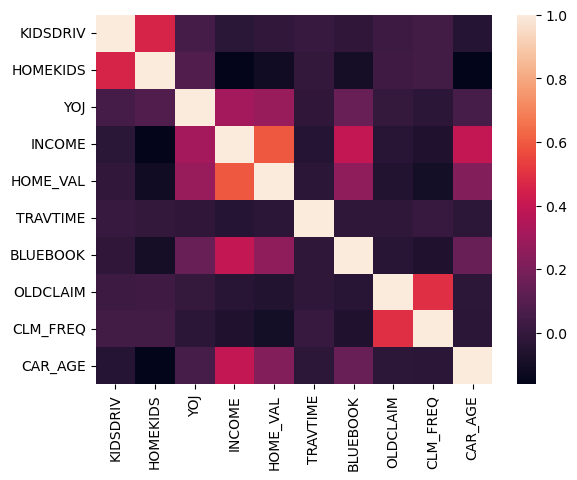

In [ ]:
sns.heatmap(df.corr()) #

Appears to be high correlation between homeval and income as expected, this may affect model performance


In [ ]:
from sklearn.preprocessing import minmax_scale # Normalise the numerical columns
cols = df.select_dtypes(np.number).columns
df[cols] = minmax_scale(df[cols])

C:\Users\mgw19\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: ylabel='Frequency'>

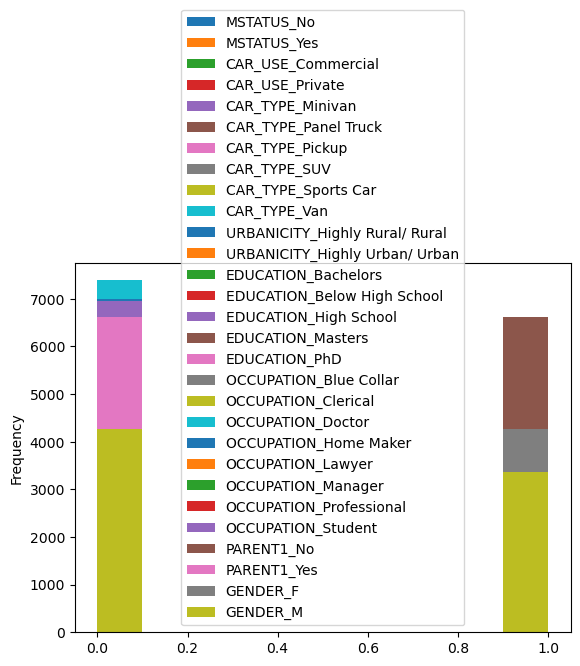

In [ ]:



    """Generate onehoteencoded features for all categorical columns in df"""

    from sklearn.preprocessing import OneHotEncoder
    model_oh = OneHotEncoder(handle_unknown="ignore", sparse=False)

    matrix = model_oh.fit_transform(df[["MSTATUS","CAR_USE","CAR_TYPE","URBANICITY","EDUCATION","OCCUPATION","PARENT1","GENDER"]])  # get a matrix of new features and values
    names = model_oh.get_feature_names_out()  # get names for these features
    df_oh = pd.DataFrame(data=matrix, columns=names, index=df.index)  # create df of these new features
    display(df_oh.plot.hist())
    df = pd.concat([df, df_oh], axis=1)  # concat with existing df
    df = df.drop(["MSTATUS"],axis =1)
    df = df.drop(["CAR_USE"],axis =1)
    df = df.drop(["CAR_TYPE"],axis =1)
    df = df.drop(["URBANICITY"],axis =1)
    df = df.drop(["EDUCATION"],axis =1)
    df = df.drop(["OCCUPATION"],axis =1)
    df = df.drop(["PARENT1"],axis =1)
    df = df.drop(["GENDER"],axis =1)


In [ ]:
X=df


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=0, shuffle=True) #
print('Number of training instances:', len(X_train))
print('Number of test instances:', len(y_test))
print(X_train.shape)
print(X_test.shape)

Number of training instances: 5735
Number of test instances: 1912
(5735, 39)
(1912, 39)


In [ ]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KIDSDRIV                        7647 non-null   float64
 1   HOMEKIDS                        7647 non-null   float64
 2   YOJ                             7647 non-null   float64
 3   INCOME                          7647 non-null   float64
 4   HOME_VAL                        7647 non-null   float64
 5   TRAVTIME                        7647 non-null   float64
 6   BLUEBOOK                        7647 non-null   float64
 7   OLDCLAIM                        7647 non-null   float64
 8   CLM_FREQ                        7647 non-null   float64
 9   CAR_AGE                         7647 non-null   float64
 10  MSTATUS_No                      7647 non-null   float64
 11  MSTATUS_Yes                     7647 non-null   float64
 12  CAR_USE_Commercial              76

None

In [ ]:
import xgboost as xg

model = xg.XGBRegressor()
model.fit(X_train, y_train)
#model.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# calculate the r-squared
from sklearn import metrics

r_squared = model.score(X_train, y_train)
print(r_squared)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE)

0.8128584752133189
Mean Absolute Error: 0.30844215404763287
Mean Squared Error: 0.16462024947237897
Root Mean Squared Error: 0.4057342103796264


## Let's try that using the random forest regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100) # create an instance of LinearRegression class
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# calculate the r-squared
from sklearn import metrics

r_squared = model.score(X_train, y_train)
print(r_squared)

RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', RMSE)


0.8857347238536495
Mean Absolute Error: 0.30245292887029285
Mean Squared Error: 0.15066940376569038
Root Mean Squared Error: 0.3881615691509019


A higher R squared and lower mean absolute error indicates this model performs better


## Let's try now with tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add another layerlayer
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # Adam is alternate to SGD
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
#model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
180/180 [==============================] - 1s 1ms/step - loss: 0.3000 - mae: 0.3000
Epoch 2/25
180/180 [==============================] - 0s 1ms/step - loss: 0.2832 - mae: 0.2832
Epoch 3/25
180/180 [==============================] - 0s 1ms/step - loss: 0.2819 - mae: 0.2819
Epoch 4/25
180/180 [==============================] - 0s 2ms/step - loss: 0.2793 - mae: 0.2793
Epoch 5/25
180/180 [==============================] - 0s 2ms/step - loss: 0.2769 - mae: 0.2769
Epoch 6/25
180/180 [==============================] - 0s 2ms/step - loss: 0.2770 - mae: 0.2770
Epoch 7/25
180/180 [==============================] - 0s 1ms/step - loss: 0.2773 - mae: 0.2773
Epoch 8/25
180/180 [==============================] - 0s 1ms/step - loss: 0.2743 - mae: 0.2743
Epoch 9/25
180/180 [==============================] - 0s 2ms/step - loss: 0.2734 - mae: 0.2734
Epoch 10/25
180/180 [==============================] - 0s 2ms/step - loss: 0.2753 - mae: 0.2753
Epoch 11/25
180/180 [============================

In [ ]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 0s 1ms/step - loss: 0.2786 - mae: 0.2786


[0.27856215834617615, 0.27856215834617615]

A mae of 0.2786 appears to be an improvement over the random forest model